Creates the database of the toolings by extracting the output file using RyR Generator target files and creates an Exploratory Data Analysis 

In [3]:
#% pip install openpyxl
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import sys
from __globals import *
from _utilities import plot_scatter
sys.path.append("../tools/")
import _db_tools as db #Personal tool for managing sqlite databases in data science

In [4]:
#Data preparation
dbh = db.SQLite_Data_Extractor("database.db") #Connect to the database
df = dbh.retrieve(glob.tooling) #Get the desired tooling data
dbh.close_conn() 
print("MEAS:")
df #Shows the df in html format

../database/database.db found.
Table PASSAT_B9 retrieved succesfully.
Closed connection to: ../database/database.db
MEAS:


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.3316,0.3316,0.3311,0.3314,0.3308,0.3298,0.3316,0.3316,0.3302,0.3298,...,0.3316,0.3316,0.3316,0.3316,0.3316,0.3315,0.3316,0.3316,0.3316,0.3316
1,0.3546,0.3546,0.3543,0.3544,0.3540,0.3534,0.3546,0.3546,0.3536,0.3534,...,0.3546,0.3546,0.3546,0.3546,0.3546,0.3545,0.3546,0.3546,0.3546,0.3546
2,0.3355,0.3355,0.3357,0.3356,0.3357,0.3350,0.3357,0.3356,0.3356,0.3352,...,0.3347,0.3355,0.3357,0.3353,0.3353,0.3356,0.3346,0.3349,0.3357,0.3351
3,0.3565,0.3565,0.3564,0.3565,0.3565,0.3562,0.3564,0.3565,0.3564,0.3563,...,0.3563,0.3565,0.3564,0.3563,0.3564,0.3565,0.3562,0.3562,0.3565,0.3565
4,0.3423,0.3424,0.3414,0.3414,0.3414,0.3416,0.3412,0.3421,0.3414,0.3412,...,0.3422,0.3410,0.3423,0.3420,0.3423,0.3422,0.3423,0.3423,0.3411,0.3411
5,0.3624,0.3625,0.3623,0.3623,0.3622,0.3623,0.3619,0.3623,0.3623,0.3619,...,0.3623,0.3618,0.3625,0.3622,0.3623,0.3623,0.3624,0.3624,0.3618,0.3618
6,0.3325,0.3325,0.3321,0.3325,0.3325,0.3322,0.3323,0.3325,0.3324,0.3318,...,0.3324,0.3320,0.3325,0.3325,0.3325,0.3325,0.3325,0.3325,0.3323,0.3320
7,0.3557,0.3557,0.3555,0.3557,0.3557,0.3556,0.3556,0.3557,0.3557,0.3554,...,0.3557,0.3555,0.3557,0.3557,0.3557,0.3557,0.3557,0.3557,0.3556,0.3554
8,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,...,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267
9,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,...,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


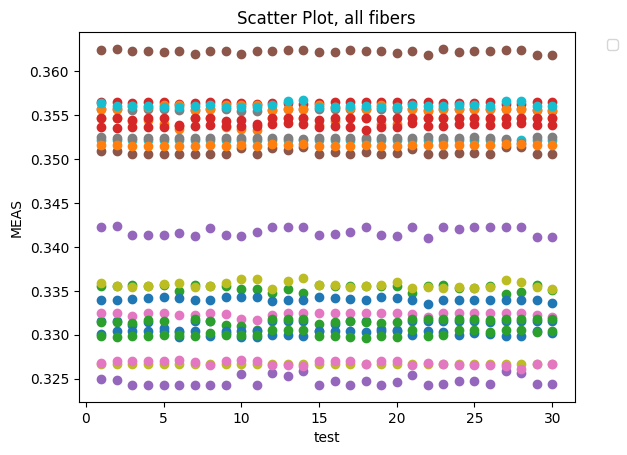

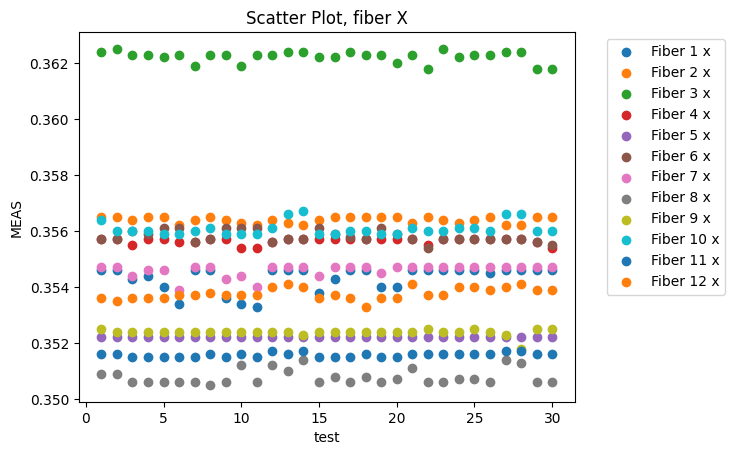

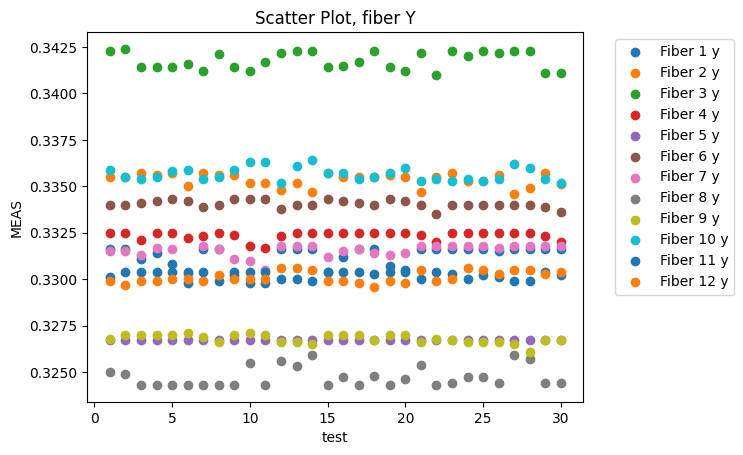

In [5]:
#Plots
plot_scatter(df, 'Scatter Plot, all fibers', 'test', 'MEAS', 'Guide: ') #Plot all guides
plot_scatter(df, 'Scatter Plot, fiber X', 'test', 'MEAS', 'Fiber', filter='x') #Plot x axis values
plot_scatter(df, 'Scatter Plot, fiber Y', 'test', 'MEAS', 'Fiber', filter='y') #Plot y axis values

In [6]:
resume = df.transpose().describe() #Transpose the df first due to describe() working in columns.
df.transpose().describe() #This second call allows for a nicer output in jupiter.

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.331200,0.354327,0.335357,0.356400,0.341773,0.362233,0.332367,0.355643,3.267000e-01,3.522000e-01,...,0.324730,0.350787,0.326793,0.352390,0.335667,0.356083,0.330240,0.351573,0.330120,0.353767
std,0.000628,0.000427,0.000341,0.000114,0.000483,0.000204,0.000226,0.000101,1.129203e-16,5.646013e-17,...,0.000544,0.000273,0.000236,0.000121,0.000356,0.000239,0.000199,0.000069,0.000304,0.000204
min,0.329800,0.353300,0.334600,0.356200,0.341000,0.361800,0.331700,0.355400,3.267000e-01,3.522000e-01,...,0.324300,0.350500,0.326100,0.351800,0.335200,0.355900,0.329900,0.351500,0.329600,0.353300
25%,0.330875,0.354075,0.335200,0.356300,0.341400,0.362200,0.332300,0.355600,3.267000e-01,3.522000e-01,...,0.324300,0.350600,0.326600,0.352400,0.335400,0.355900,0.330025,0.351500,0.329900,0.353600
50%,0.331600,0.354600,0.335500,0.356400,0.341700,0.362300,0.332500,0.355700,3.267000e-01,3.522000e-01,...,0.324400,0.350600,0.326800,0.352400,0.335500,0.356000,0.330400,0.351600,0.330000,0.353700
75%,0.331600,0.354600,0.335600,0.356500,0.342300,0.362375,0.332500,0.355700,3.267000e-01,3.522000e-01,...,0.324975,0.350900,0.327000,0.352400,0.335900,0.356100,0.330400,0.351600,0.330475,0.353975
max,0.331600,0.354600,0.335700,0.356500,0.342400,0.362500,0.332500,0.355700,3.267000e-01,3.522000e-01,...,0.325900,0.351400,0.327100,0.352500,0.336400,0.356700,0.330400,0.351700,0.330600,0.354100


Analysis of faulty fibers

In [7]:
largest = resume.loc['std'].sort_values(ascending=False)[:5]  #Filter the 5 largest values
index = largest.index.tolist()  #Get the index in a list format
for i in range(largest.shape[0]): #Differentiate between x-fibers (odds) and y-fibers
    if index[i] % 2 == 0:
        index[i] = f"fiber x {index[i]+1}:"
    else:
        index[i] = f"fiber y {index[i]+1}:"
largest.index = index
print("Fibers with largest deviation:")
print(largest)

Fibers with largest deviation:
fiber x 1:     0.000628
fiber x 15:    0.000544
fiber x 5:     0.000483
fiber y 2:     0.000427
fiber x 13:    0.000385
Name: std, dtype: float64


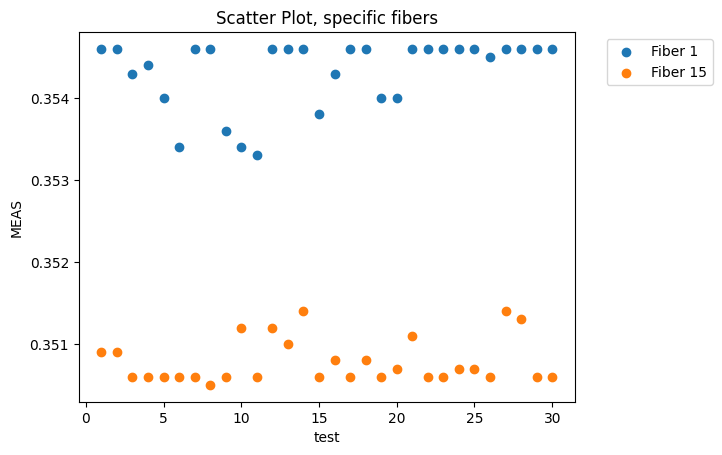

In [10]:
plot_scatter(df, 'Scatter Plot, specific fibers', 'test', 'MEAS', 'Fiber', filter=[1, 15])